## Simple Linear Regression Demonstration

We're using the python libraries scikit-learn and pandas

#### Step 1: Load, Clean & Analyse the data

Load the training data from a csv (comma separated values) file.

In [1]:
import pandas as pd

df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/ml_fc/demo2_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Do a quick plot of the data to check is the relationship betweeen the variables broadly linear.

array([[<AxesSubplot:xlabel='YearsExperience', ylabel='YearsExperience'>,
        <AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>],
       [<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>]], dtype=object)

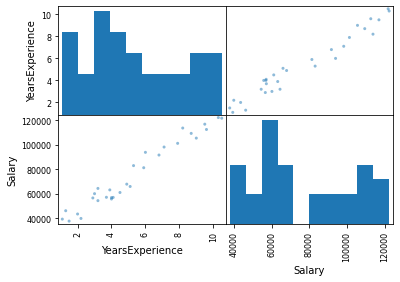

In [2]:
%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(df)

### Step 2: Decide what are the predictors and what are the output variables
Separate the 'input' and 'output' variables.

In [3]:
X = df[ ['YearsExperience'] ]      ## Cause -> "independant variable set"
 
y = df['Salary']         ## Effect -> "dependant variable"


#### Step 3: "train-test-split"

We need to measure the accuracy of the model __after__ it's trained. We want to use fresh data that wasn't used during training for this. So, we split the data into a "training" and "testing" set.

The "training" set is used for the model to identify patterns (train the model). The "testing" set is used to measure how accurate the model is after training. 

In this simple example we keep 20% of the data aside to test the model later. The remaining 80% of data will be used to train the model. The 80/20 split here is random.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Step 4: Choose and train a model
Train a simple linear regression model on the training data.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#### Step 5: Examine & Measure the results 

Firstly, let's take a look at what has been done on a plot.

Plot:

* **Blue:** the model's prediction line.
* **Red:** the data that was given to the model to train it.
* **Green:** the data kept for testing.

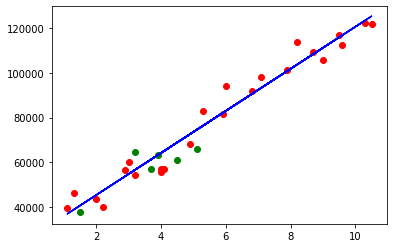

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='green')

plt.plot(X_train, model.predict(X_train), color='blue')

This model could now be used to build analytics, or it could be "deployed" to make predictions for new data

For example "What salary should I expect if I have 4 years experience?":

In [7]:
# predict the salary if years experience is 4

model.predict([[4]])

array([64160.86802515])

To get a more formal accuracy score of how well the model predicts the 20% of data that was kept aside we could use a number of statistical formulas.

A common measure is the "R2 score". We won't get into the details here, but a simple definition of this would be:

```r2_score = (total variance explained by model) / total variance```

In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test))

0.6050341963504295

#### Further Steps
More model algorithms are available to achieve similar results.

For example, we could try a different linear regression model to see how they compare.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [9]:
from sklearn.linear_model import Ridge

# create a Ridge model object
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# check the accuracy of this new model with the test data
r2_score(y_test, ridge_model.predict(X_test))

0.6022992840630714